# how to handle Missing values in dataset


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
data = pd.read_csv('C:/Users/user/Desktop/Diab.csv')
data


,no_preg,pg_conc,dia_bp,tri_sf_th,ser_ins,bmi,diab_ped,age,class_val,class
0,6,148,72,35,0,33.6,0.627,50,positive,1
1,1,85,66,29,0,26.6,0.351,31,negative,0
2,8,183,64,0,0,23.3,0.672,32,positive,1
3,1,89,66,23,94,28.1,0.167,21,negative,0
4,0,137,40,35,168,43.1,2.288,33,positive,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,negative,0
764,2,122,70,27,0,36.8,0.340,27,negative,0
765,5,121,72,23,112,26.2,0.245,30,negative,0
766,1,126,60,0,0,30.1,0.349,47,positive,1


In [3]:
data.columns

Index(['no_preg', 'pg_conc', 'dia_bp', 'tri_sf_th', 'ser_ins', 'bmi',
       'diab_ped', 'age', 'class_val', 'class'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no_preg    768 non-null    int64  
 1   pg_conc    768 non-null    int64  
 2   dia_bp     768 non-null    int64  
 3   tri_sf_th  768 non-null    int64  
 4   ser_ins    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   diab_ped   768 non-null    float64
 7   age        768 non-null    int64  
 8   class_val  768 non-null    object 
 9   class      768 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [5]:
data.isna().any()

no_preg      False
pg_conc      False
dia_bp       False
tri_sf_th    False
ser_ins      False
bmi          False
diab_ped     False
age          False
class_val    False
class        False
dtype: bool

In [6]:
data.describe()

,no_preg,pg_conc,dia_bp,tri_sf_th,ser_ins,bmi,diab_ped,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# min "0" does not make sense in pg_conc,dia_bp and so on...
# so, replace this values with NaN
from numpy import nan
data['pg_conc']=data['pg_conc'].replace(0,np.nan)

In [8]:
data['dia_bp']=data['dia_bp'].replace(0,np.nan)
data['tri_sf_th']=data['tri_sf_th'].replace(0,np.nan)
data['ser_ins']=data['ser_ins'].replace(0,np.nan)
data['bmi']=data['bmi'].replace(0,np.nan)

In [9]:
data.describe()

,no_preg,pg_conc,dia_bp,tri_sf_th,ser_ins,bmi,diab_ped,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# count of NaN values in the dataset
print(data.isnull().sum())

no_preg        0
pg_conc        5
dia_bp        35
tri_sf_th    227
ser_ins      374
bmi           11
diab_ped       0
age            0
class_val      0
class          0
dtype: int64


In [11]:
data.median()

no_preg        3.0000
pg_conc      117.0000
dia_bp        72.0000
tri_sf_th     29.0000
ser_ins      125.0000
bmi           32.3000
diab_ped       0.3725
age           29.0000
class          0.0000
dtype: float64

In [12]:
# Imputing Missing Values with their respective columns 'Median'
data.fillna(data.median(), inplace=True)

In [13]:
data.head()

,no_preg,pg_conc,dia_bp,tri_sf_th,ser_ins,bmi,diab_ped,age,class_val,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,positive,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,negative,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,positive,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,negative,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,positive,1


In [14]:
# check if the missing values have been imputed 
print(data.isnull().sum())

no_preg      0
pg_conc      0
dia_bp       0
tri_sf_th    0
ser_ins      0
bmi          0
diab_ped     0
age          0
class_val    0
class        0
dtype: int64


# Outlier Detection & Treatment

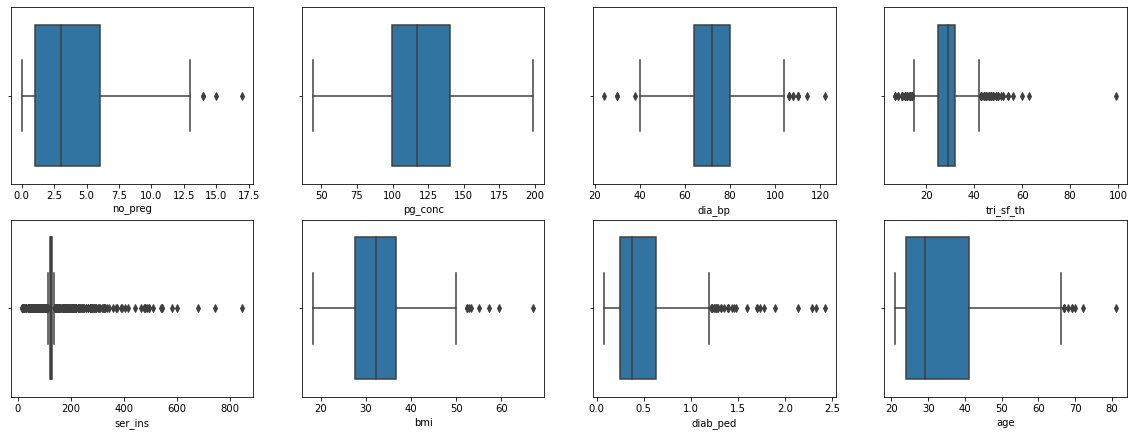

In [15]:
# Outlier Detection Using Boxplots
import seaborn as sns

plt.figure(figsize=(20, 15))
plt.subplot(4,4,1)
sns.boxplot(data['no_preg'])

plt.subplot(4,4,2)
sns.boxplot(data['pg_conc'])

plt.subplot(4,4,3)
sns.boxplot(data['dia_bp'])

plt.subplot(4,4,4)
sns.boxplot(data['tri_sf_th'])

plt.subplot(4,4,5)
sns.boxplot(data['ser_ins'])

plt.subplot(4,4,6)
sns.boxplot(data['bmi'])

plt.subplot(4,4,7)
sns.boxplot(data['diab_ped'])

plt.subplot(4,4,8)
sns.boxplot(data['age'])

In [16]:
# Fixing Outliers

data['no_preg']=data['no_preg'].clip(lower=data['no_preg'].quantile(0.05), upper=data['no_preg'].quantile(0.95))

data['dia_bp']=data['dia_bp'].clip(lower=data['dia_bp'].quantile(0.05), upper=data['dia_bp'].quantile(0.95))

data['tri_sf_th']=data['tri_sf_th'].clip(lower=data['tri_sf_th'].quantile(0.05), upper=data['tri_sf_th'].quantile(0.95))

data['ser_ins']=data['ser_ins'].clip(lower=data['ser_ins'].quantile(0.05), upper=data['ser_ins'].quantile(0.95))

data['bmi']=data['bmi'].clip(lower=data['bmi'].quantile(0.05), upper=data['bmi'].quantile(0.95))

data['diab_ped']=data['diab_ped'].clip(lower=data['diab_ped'].quantile(0.05), upper=data['diab_ped'].quantile(0.95))

data['age']=data['age'].clip(lower=data['age'].quantile(0.05), upper=data['age'].quantile(0.95))


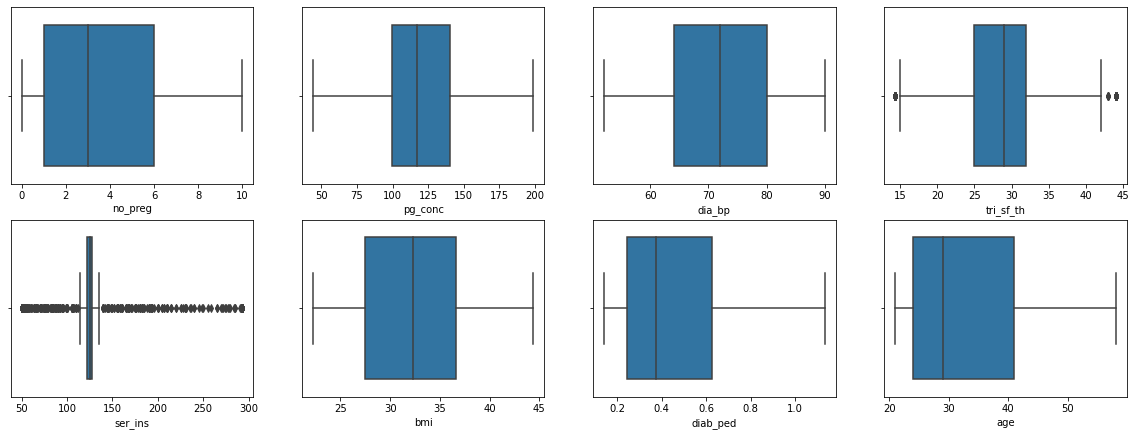

In [17]:
# Lets Visualise The Boxplots After Imputing the Outliers

plt.figure(figsize=(20, 15))
plt.subplot(4,4,1)
sns.boxplot(data['no_preg'])

plt.subplot(4,4,2)
sns.boxplot(data['pg_conc'])

plt.subplot(4,4,3)
sns.boxplot(data['dia_bp'])

plt.subplot(4,4,4)
sns.boxplot(data['tri_sf_th'])

plt.subplot(4,4,5)
sns.boxplot(data['ser_ins'])

plt.subplot(4,4,6)
sns.boxplot(data['bmi'])

plt.subplot(4,4,7)
sns.boxplot(data['diab_ped'])

plt.subplot(4,4,8)
sns.boxplot(data['age'])

In [18]:
# as we can see, there are still outliers in columns 'tri_sf_th' & 'ser_ins'. lets try manipulating the percentiles values

data['tri_sf_th']=data['tri_sf_th'].clip(lower=data['tri_sf_th'].quantile(0.07), upper=data['tri_sf_th'].quantile(0.93))

data['ser_ins']=data['ser_ins'].clip(lower=data['ser_ins'].quantile(0.25), upper=data['ser_ins'].quantile(0.75))


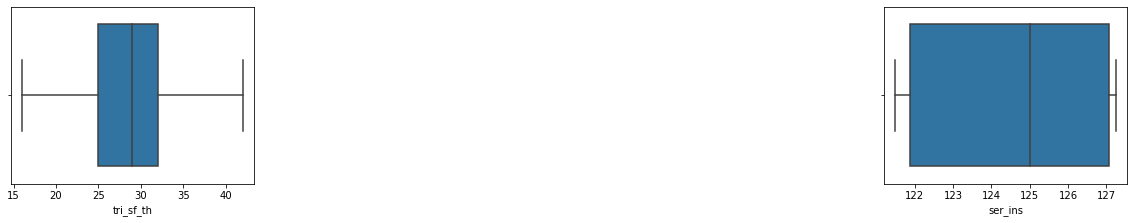

In [19]:
# Lets Visualise The Boxplots AGAIN After Imputing the Outliers

plt.figure(figsize=(20, 15))
plt.subplot(4,4,1)
sns.boxplot(data['tri_sf_th'])

plt.subplot(4,4,4)
sns.boxplot(data['ser_ins'])

# Data Visualization

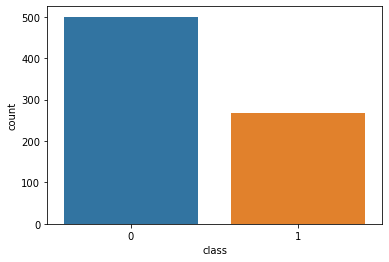

In [21]:
# Lets start by understanding the distrubution Diabetic Vs Non Diabetic patients in the dataset
sns.countplot(data['class'])

In [ ]:
# from the above plot, its clear that 65% data belongs to non diabetic patients.the dataset has a class imbalance &
# might have to be treated in future, during the model building stages

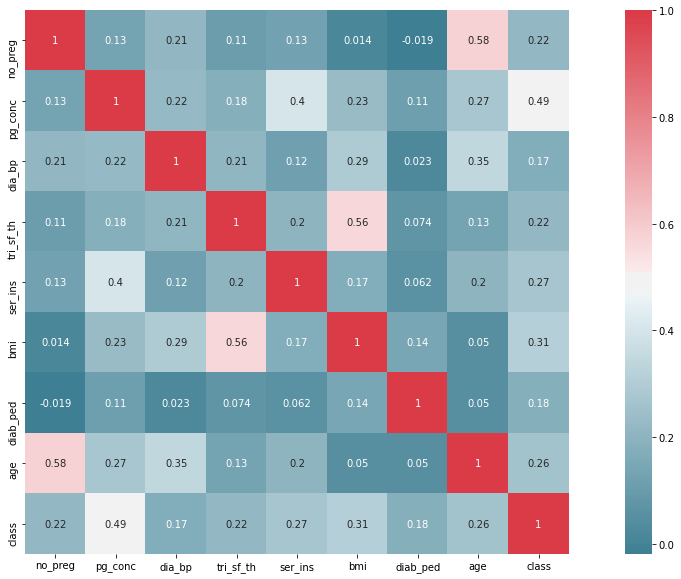

In [23]:
# Lets plot cor-relation plot . this plot will help us understand if there is multi colinearity in the dataset

f,ax = plt.subplots(figsize=(20,10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax, annot=True)

In [ ]:
# from the above plot there is no high multi colinearity in the dataset

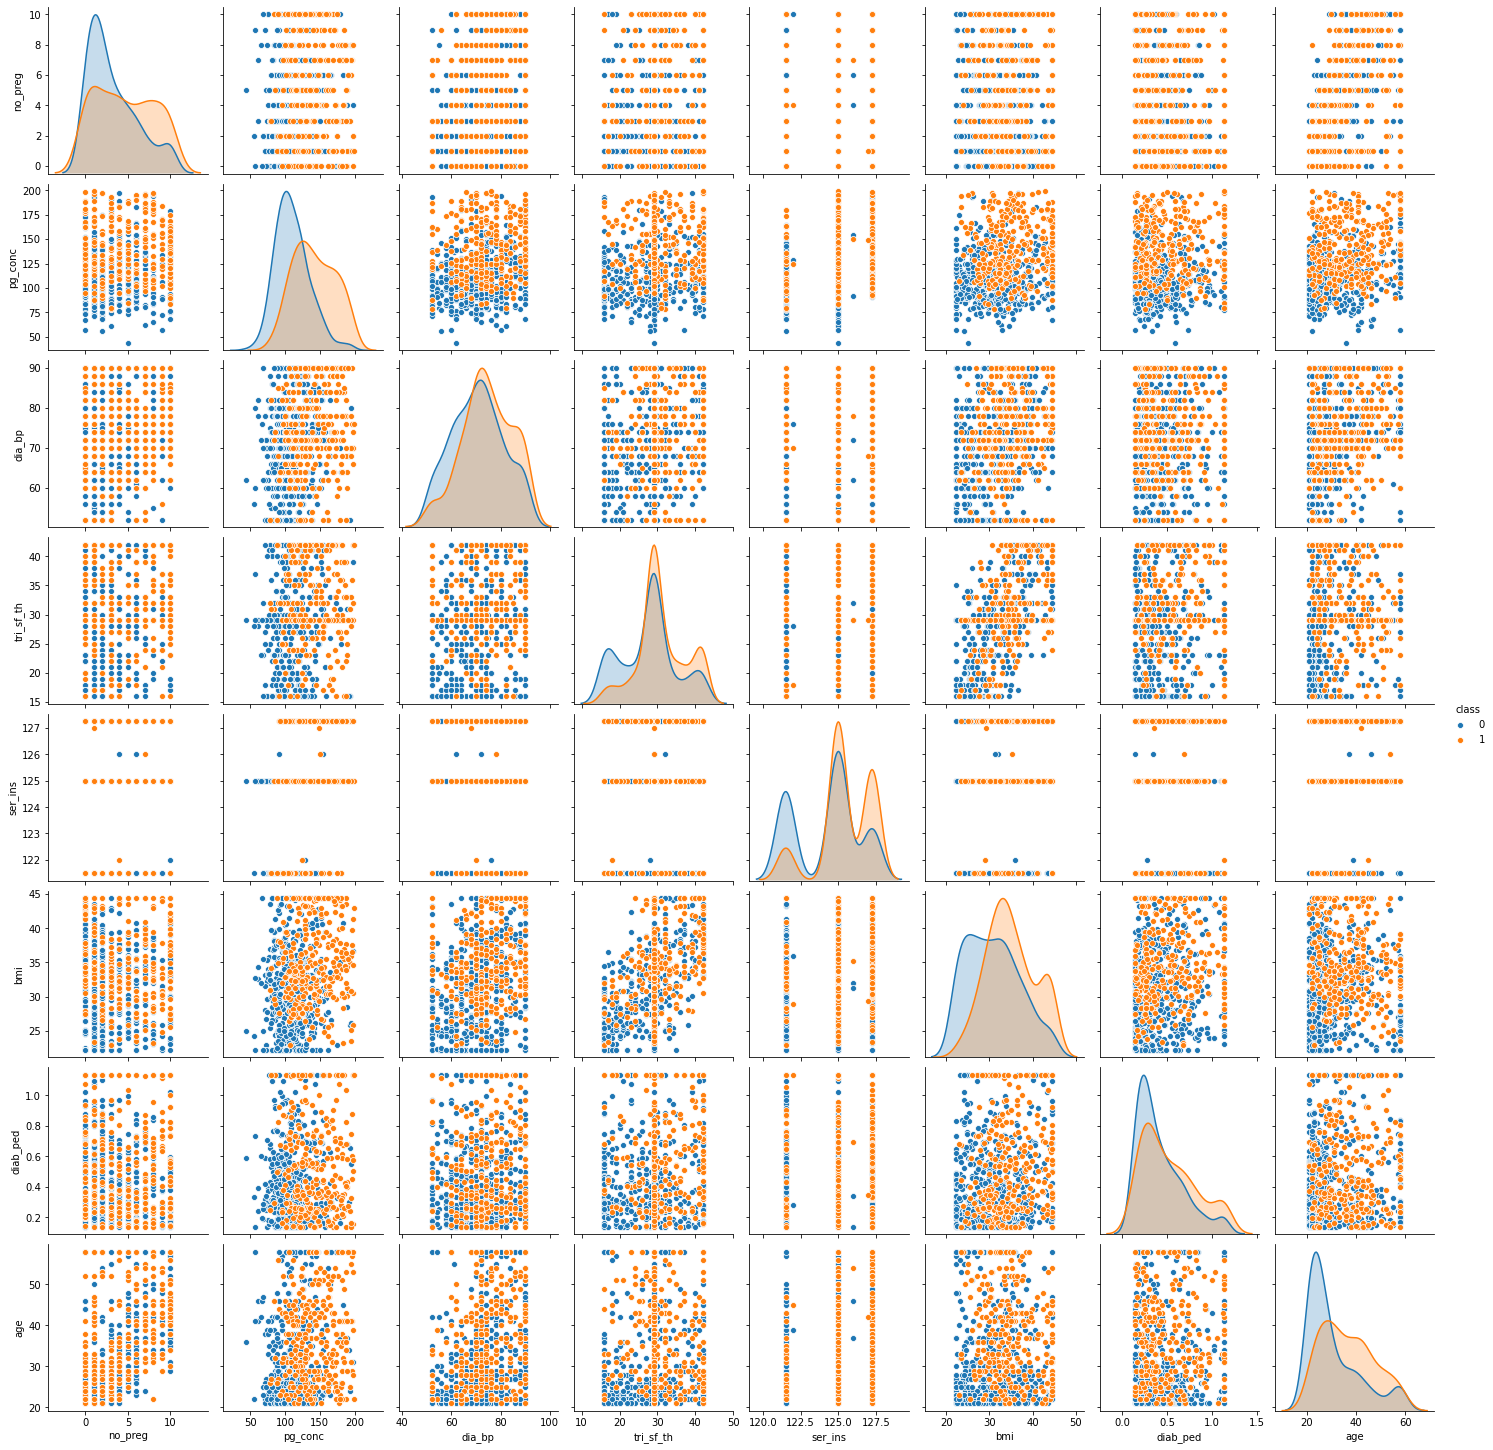

In [24]:
# Pair plot Analysis
sns.pairplot(data,hue='class',diag_kind='kde')

#  Exploratory Data Analysis on Automobile Data set

In [1]:
# Importing all the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets
data = pd.read_csv('C:/Users/user/Downloads/Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [32]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [34]:
data.shape

(205, 26)

In [35]:
data.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [37]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [38]:
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [39]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Missing Value Detection & Treatment

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

 no blank records, but  missing records represented by '?'

  we can also see that there are a total of 11 continues variables, but the describe table has only 10 contineus variables. this is because column "normalised losses" has missing values

In [44]:
# Treating missing values in the " normalised losses" column
from numpy import nan

data["normalized-losses"] = data["normalized-losses"].replace('?', np.nan)

In [45]:
# Lets check  '?' have been replaced with NaN
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [46]:
print(data.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


In [47]:
# Imputing missing values with their respective column Median
data.fillna(data.median(), inplace=True)

In [48]:
print(data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [49]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Also noticed that the data type of 'Normalised losses' is object, we have to change its data type to numeric(float)

In [52]:
# convert Datatype
data["normalized-losses"] = pd.to_numeric(data["normalized-losses"], downcast="float")

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Outlier Detection & Treatment

In [54]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

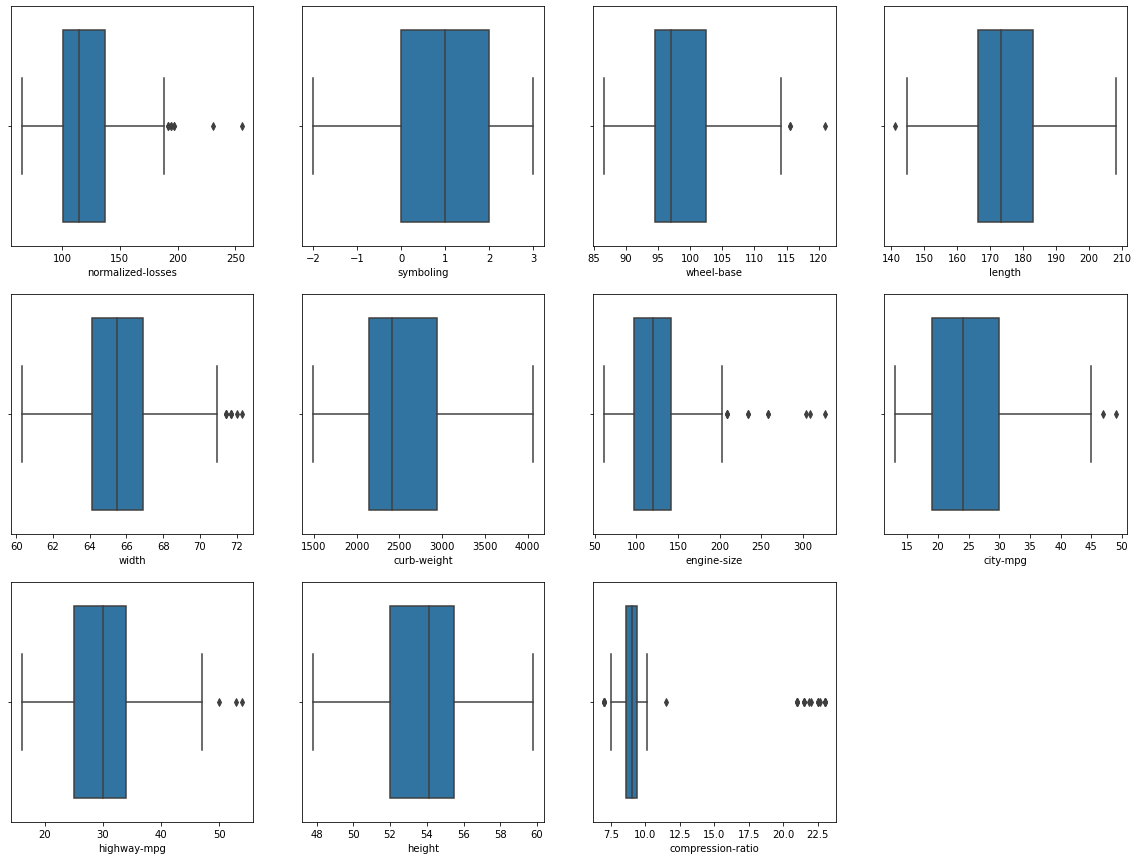

In [55]:
# Outlier Detection using Boxplot

plt.figure(figsize=(20, 15))


plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])


In [58]:
# From the above boxplot we can infer that out,11 contineus variable 8 of them have outlier. These Outlier will be imputed 95th%

# Fixing Outliers

data['normalized-losses']=data['normalized-losses'].clip(lower=data['normalized-losses'].quantile(0.05), upper=data['normalized-losses'].quantile(0.95))

data['wheel-base']=data['wheel-base'].clip(lower=data['wheel-base'].quantile(0.05), upper=data['wheel-base'].quantile(0.95))

data['length']=data['length'].clip(lower=data['length'].quantile(0.05), upper=data['length'].quantile(0.95))

data['width']=data['width'].clip(lower=data['width'].quantile(0.05), upper=data['width'].quantile(0.95))

data['engine-size']=data['engine-size'].clip(lower=data['engine-size'].quantile(0.05), upper=data['engine-size'].quantile(0.95))

data['city-mpg']=data['city-mpg'].clip(lower=data['city-mpg'].quantile(0.05), upper=data['city-mpg'].quantile(0.95))

data['highway-mpg']=data['highway-mpg'].clip(lower=data['highway-mpg'].quantile(0.05), upper=data['highway-mpg'].quantile(0.95))

data['compression-ratio']=data['compression-ratio'].clip(lower=data['compression-ratio'].quantile(0.05), upper=data['compression-ratio'].quantile(0.89))

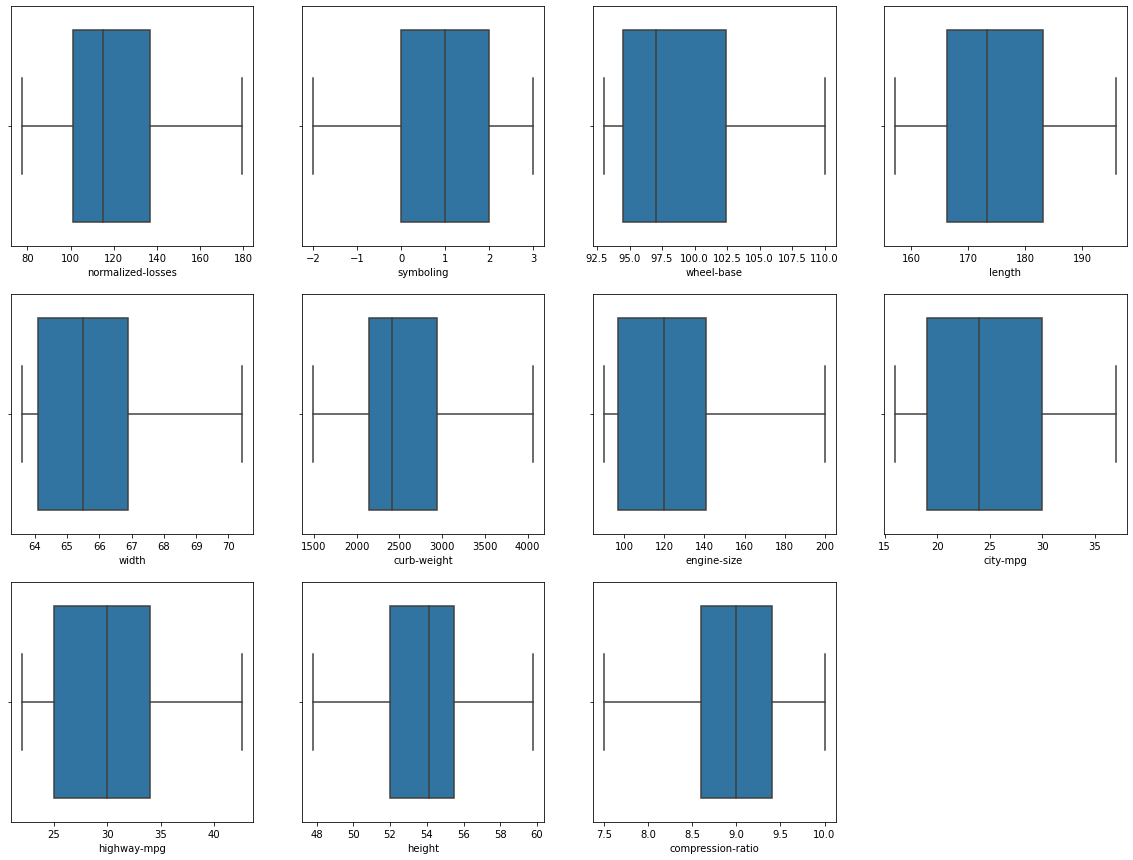

In [59]:
# check again
plt.figure(figsize=(20, 15))


plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])

# Data Visualization

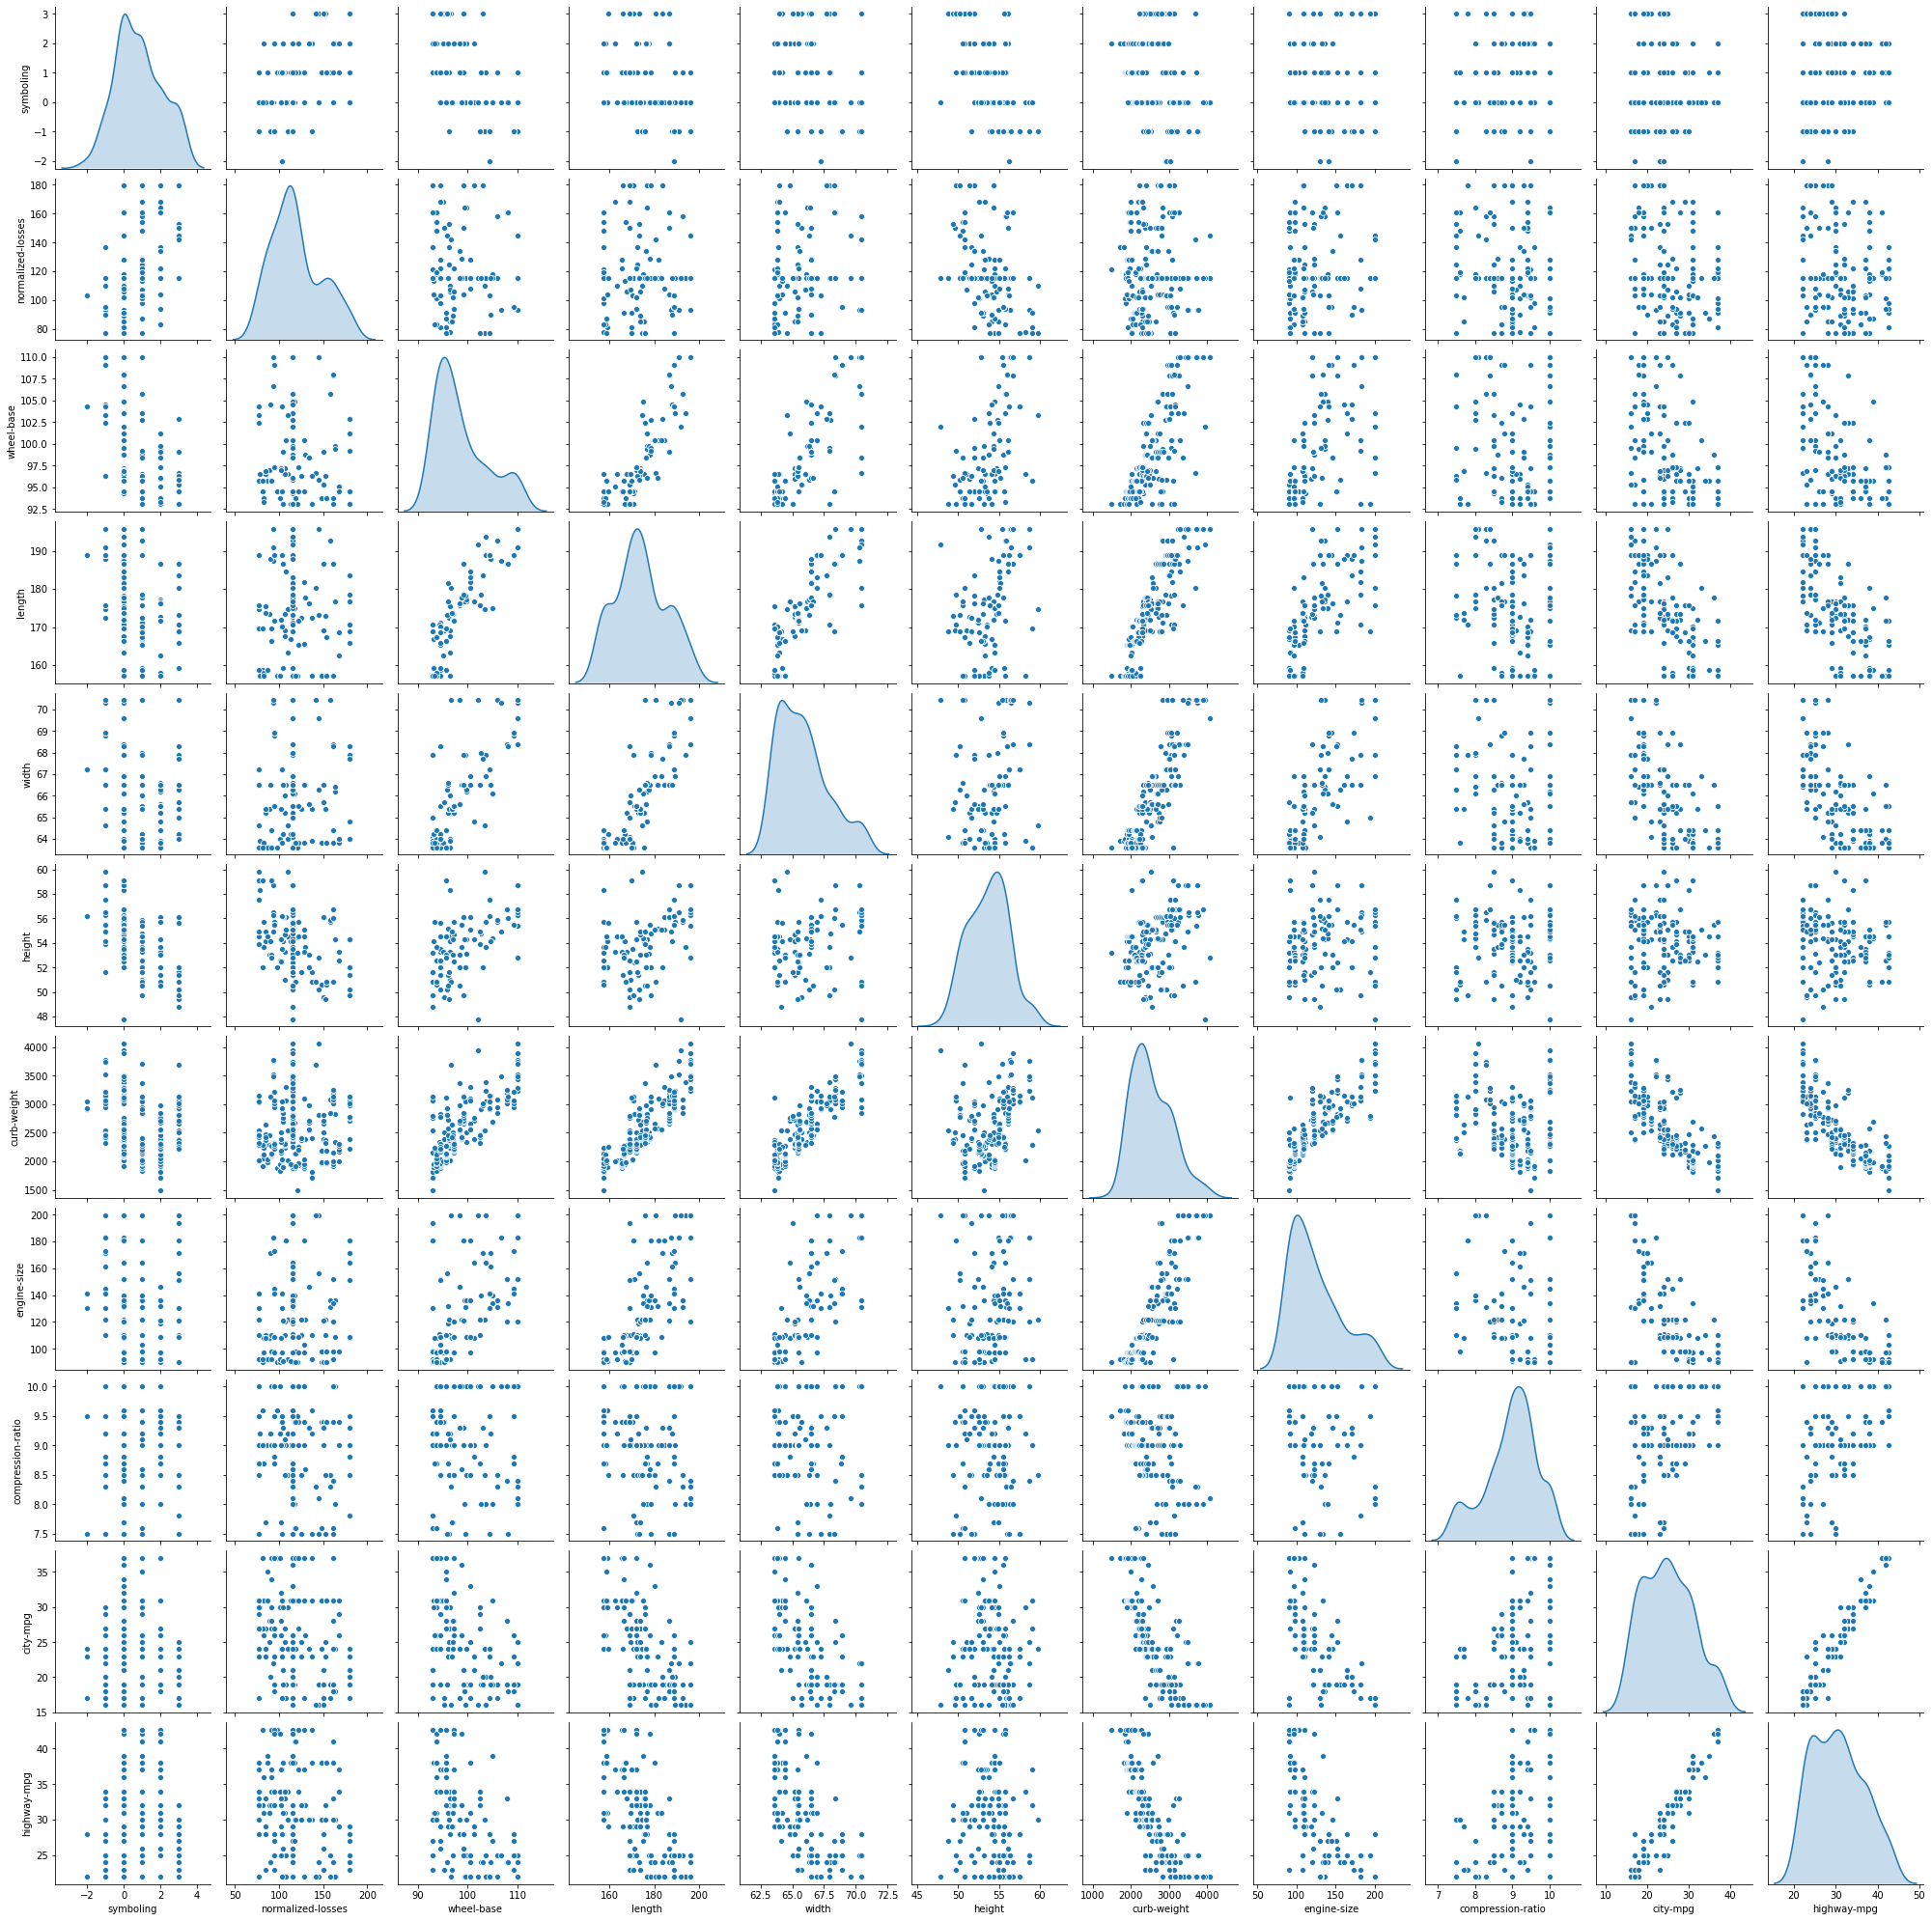

In [60]:
sns.pairplot(data,diag_kind='kde')

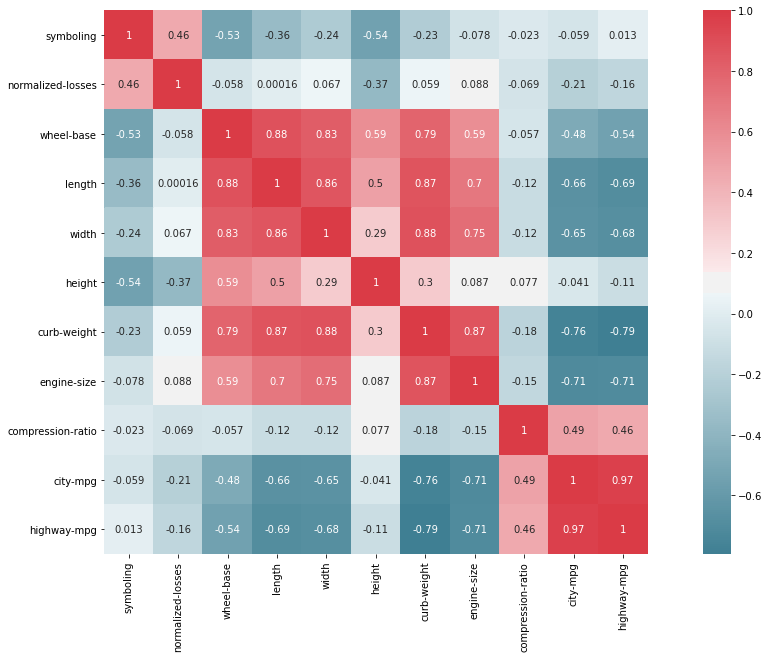

In [61]:
# Lets plot cor-relation plot . this plot will help us understand if there is multi colinearity in the dataset

f,ax = plt.subplots(figsize=(20,10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax, annot=True)

 The above corrplot shows presence of multi colinearity in the data set 

Text(0.5, 0, 'Fuel type')

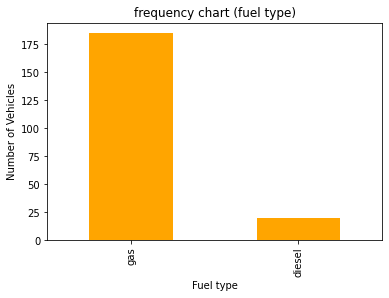

In [62]:
# from the following plot, majority of the cars recorded in this dataset run on gas
data['fuel-type'].value_counts().plot(kind='bar', color='orange')
plt.title("frequency chart (fuel type)")
plt.ylabel('Number of Vehicles')
plt.xlabel("Fuel type")

# Data Preprocessing

dataset has 15 categorical variable and most of them have more than 2 categories in order to deal with this challenge lets learn label Encoding

In [63]:
# data before Label Encoding
data['body-style'].head(20)

0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
5           sedan
6           sedan
7           wagon
8           sedan
9       hatchback
10          sedan
11          sedan
12          sedan
13          sedan
14          sedan
15          sedan
16          sedan
17          sedan
18      hatchback
19      hatchback
Name: body-style, dtype: object

In [69]:
# Label Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['body-style'] = labelencoder.fit_transform(data['body-style'])

In [70]:
# Data after label Encoding  ..........................(DO NOT RUN)
data['body-style'].head(20)

0     0
1     0
2     2
3     3
4     3
5     3
6     3
7     4
8     3
9     2
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    2
19    2
Name: body-style, dtype: int32

In [71]:
# data before one one hot encoding
data['body-style'].head(10)

0    0
1    0
2    2
3    3
4    3
5    3
6    3
7    4
8    3
9    2
Name: body-style, dtype: int32

In [73]:
# One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['body-style']]). toarray())

In [78]:
# Data after One Hot Encoding
enc_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
200,0.0,0.0,0.0,1.0,0.0
201,0.0,0.0,0.0,1.0,0.0
202,0.0,0.0,0.0,1.0,0.0
203,0.0,0.0,0.0,1.0,0.0


In [3]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
data.iloc[0:2,0:5]

,symboling,normalized-losses,make,fuel-type,aspiration
0,3,?,alfa-romero,gas,std
1,3,?,alfa-romero,gas,std
